In [1]:
import gym
import agent as my_agent
import torch
import variable as v
from tqdm import tqdm
import utils
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
env = gym.make('CartPole-v0')
train_session = None

In [3]:
num_action = env.action_space.n
dim_state = env.observation_space.shape[0]
seed = 79 #78

## Base Agent

In [4]:
actor_archi = [{'type': 'linear', 'in': dim_state, 'out': 32, 'activation': 'relu', 'kwargs': {}}, 
                {'type': 'linear', 'in': 32, 'out': 64, 'activation': 'relu', 'kwargs': {}},
                {'type': 'linear', 'in': 64, 'out': num_action, 'activation': 'softmax', 'kwargs': {'dim': 0}}]

a2c_critic_archi = [{'type': 'linear', 'in': dim_state, 'out': 64, 'activation': 'relu', 'kwargs': {}}, 
            {'type': 'linear', 'in': 64, 'out': 32, 'activation': 'relu', 'kwargs': {}},
            {'type': 'linear', 'in': 32, 'out': 1, 'activation': 'tanh', 'kwargs': {}}]

qac_critic_archi = [{'type': 'linear', 'in': dim_state, 'out': 64, 'activation': 'relu', 'kwargs': {}}, 
            {'type': 'linear', 'in': 64, 'out': 32, 'activation': 'relu', 'kwargs': {}},
            {'type': 'linear', 'in': 32, 'out': num_action, 'activation': 'tanh', 'kwargs': {}}]

a2c_agent_init = {
    'seed': seed,
    'discount_factor': .99,
    'num_action': num_action,
    'actor_init': {
        'seed': seed,
        'nn_archi': actor_archi,
        'entropy_learning_rate': 0.05
    },
    'critic_init': {
        'seed': seed,
        'nn_archi': a2c_critic_archi
    },
    'optim_actor': {'lr': 5e-4},
    'optim_critic': {'lr': 5e-4},
}
qac_agent_init = deepcopy(a2c_agent_init)
qac_agent_init['critic_init']['nn_archi'] = qac_critic_archi

### To compare Agent(s)

In [5]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [6]:
agents_created = {
    'qac_agent': my_agent.QACAgent(qac_agent_init), 
    'a2c_agent': my_agent.A2CAgent(a2c_agent_init)
}
manual_agent_names = train_session.append_agents(agents_created)

In [7]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- qac_agent
- a2c_agent


In [8]:
n_episode = 700
t_max_per_episode = 1000
graphical = False

In [9]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode, 
                    graphical=graphical, agent_subset=manual_agent_names)

100%|██████████| 700/700 [00:38<00:00, 17.96it/s]


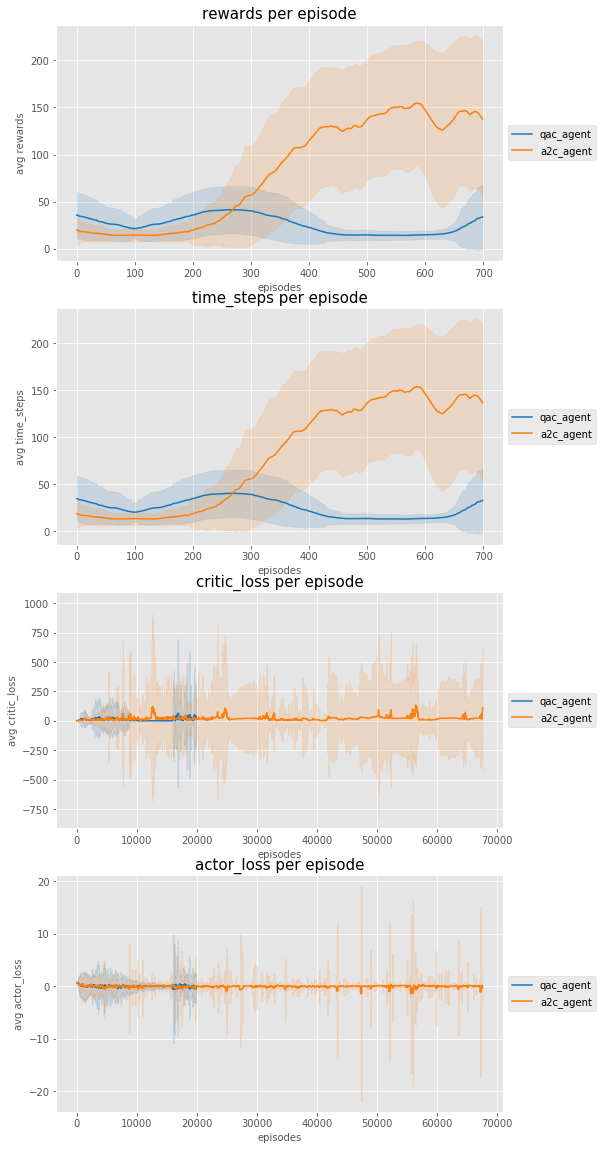

In [10]:
train_session.plot_results(window=200, agent_subset=manual_agent_names)

In [11]:
agents_to_plot = {agent_name: train_session.agents[agent_name] for agent_name in manual_agent_names}
loss_per_agents = {'critic_loss': {agent_name: (np.array(agent.critic.loss_history) if 'critic' in agent.__dict__.keys()
                         else np.array([]))
            for agent_name, agent
            in agents_to_plot.items()},
   'actor_loss': {agent_name: (np.array(agent.actor.loss_history) if 'actor' in agent.__dict__.keys()
                               else np.array([]))
                  for agent_name, agent
                  in agents_to_plot.items()}
   }

In [14]:
loss_per_agents['critic_loss']['a2c_agent'][0].item()

10.370633125305176

In [11]:
env.close()

In [43]:
c = C()

In [44]:
d = D()

In [45]:
d.var

1